In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import env
import acquire
import wrangle

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split


# Acquire
    Using acuire fuction get_zillow_data

In [2]:
df = acquire.get_zillow_data()
df.head(20)

Reading from csv file...


,id,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,propertylandusetypeid
0,1,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0,261.0
1,15,0.0,0.0,NaN,10.0,NaN,NaN,6037.0,261.0
2,16,0.0,0.0,NaN,10.0,NaN,NaN,6037.0,261.0
3,17,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0,261.0
4,20,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0,261.0
5,27,0.0,0.0,NaN,124.0,NaN,NaN,6037.0,261.0
6,31,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0,261.0
7,33,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0,261.0
8,38,0.0,0.0,NaN,6730242.0,NaN,80348.13,6037.0,261.0
9,39,0.0,0.0,NaN,15532.0,NaN,248.89,6037.0,261.0


    Verifiy that all data is property code 261 

In [3]:
df.propertylandusetypeid.value_counts()


261.0    2152863
Name: propertylandusetypeid, dtype: int64

    verify that the is no duplicate data in col: id

In [4]:
df.duplicated(subset=['id']).sum()

0

In [5]:
df.shape

(2152863, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 9 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   id                            int64  
 1   bedroomcnt                    float64
 2   bathroomcnt                   float64
 3   calculatedfinishedsquarefeet  float64
 4   taxvaluedollarcnt             float64
 5   yearbuilt                     float64
 6   taxamount                     float64
 7   fips                          float64
 8   propertylandusetypeid         float64
dtypes: float64(8), int64(1)
memory usage: 147.8 MB


    Get basic statistics of dataframe

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2152863.0,1.490834e+06,860878.470977,1.00,745117.00,1490613.00,2235859.50,2982282.00
bedroomcnt,2152852.0,3.287196e+00,0.954754,0.00,3.00,3.00,4.00,25.00
bathroomcnt,2152852.0,2.230688e+00,0.999280,0.00,2.00,2.00,3.00,32.00
calculatedfinishedsquarefeet,2144379.0,1.862855e+03,1222.125124,1.00,1257.00,1623.00,2208.00,952576.00
taxvaluedollarcnt,2152370.0,4.618962e+05,699676.049600,1.00,188170.25,327671.00,534527.00,98428909.00
yearbuilt,2143526.0,1.960950e+03,22.162196,1801.00,1949.00,1958.00,1976.00,2016.00
taxamount,2148421.0,5.634866e+03,8178.910249,1.85,2534.98,4108.95,6414.32,1337755.86
fips,2152863.0,6.048377e+03,20.433292,6037.00,6037.00,6037.00,6059.00,6111.00
propertylandusetypeid,2152863.0,2.610000e+02,0.000000,261.00,261.00,261.00,261.00,261.00


    Get a count of total NaN values by column of DataFrame

In [8]:
df.isna().sum()

id                                 0
bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
taxvaluedollarcnt                493
yearbuilt                       9337
taxamount                       4442
fips                               0
propertylandusetypeid              0
dtype: int64

In [9]:
df_prep = df.copy(deep=True)

In [10]:
df_prep.dtypes

id                                int64
bedroomcnt                      float64
bathroomcnt                     float64
calculatedfinishedsquarefeet    float64
taxvaluedollarcnt               float64
yearbuilt                       float64
taxamount                       float64
fips                            float64
propertylandusetypeid           float64
dtype: object

In [11]:
df_prep.head(10)

,id,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,propertylandusetypeid
0,1,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0,261.0
1,15,0.0,0.0,NaN,10.0,NaN,NaN,6037.0,261.0
2,16,0.0,0.0,NaN,10.0,NaN,NaN,6037.0,261.0
3,17,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0,261.0
4,20,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0,261.0
5,27,0.0,0.0,NaN,124.0,NaN,NaN,6037.0,261.0
6,31,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0,261.0
7,33,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0,261.0
8,38,0.0,0.0,NaN,6730242.0,NaN,80348.13,6037.0,261.0
9,39,0.0,0.0,NaN,15532.0,NaN,248.89,6037.0,261.0


    convert all zero in columns: ('bedroomcnt', 'bathroomcnt') to NaN

In [12]:
bed_bath_0_columns = ['bedroomcnt', 'bathroomcnt']
df_prep[bed_bath_0_columns] = df_prep[bed_bath_0_columns].replace(0, np.NaN)

    idenify all NaN values in df

In [13]:
df_prep.isnull().sum()

id                                  0
bedroomcnt                      13198
bathroomcnt                     13038
calculatedfinishedsquarefeet     8484
taxvaluedollarcnt                 493
yearbuilt                        9337
taxamount                        4442
fips                                0
propertylandusetypeid               0
dtype: int64

    calculate percentage of NaN values in each columns

In [14]:
df_prep.isnull().mean() * 100

id                              0.000000
bedroomcnt                      0.613044
bathroomcnt                     0.605612
calculatedfinishedsquarefeet    0.394080
taxvaluedollarcnt               0.022900
yearbuilt                       0.433702
taxamount                       0.206330
fips                            0.000000
propertylandusetypeid           0.000000
dtype: float64

In [15]:
df_prep.isnull().sum()

id                                  0
bedroomcnt                      13198
bathroomcnt                     13038
calculatedfinishedsquarefeet     8484
taxvaluedollarcnt                 493
yearbuilt                        9337
taxamount                        4442
fips                                0
propertylandusetypeid               0
dtype: int64

    Give that logically one could not predict floor plans of any given home since given the data at hand. 
    Droping rows with NaN values in columns'bedroomcnt', 'bathroomcnt' totaling (13,198). Which will still leave 2,152,863 unique home rows to make predictions

In [16]:
df_prep = df_prep.dropna(subset=['bedroomcnt', 'bathroomcnt'], axis=0)
df_prep.reset_index(drop=True)

,id,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,propertylandusetypeid
0,20,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0,261.0
1,31,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0,261.0
2,33,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0,261.0
3,110,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0,261.0
4,111,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0,261.0
...,...,...,...,...,...,...,...,...,...
2138721,2982265,4.0,4.0,4375.0,422400.0,2015.0,13877.56,6037.0,261.0
2138722,2982268,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0,261.0
2138723,2982270,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0,261.0
2138724,2982275,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0,261.0


In [17]:
df_prep.shape

(2138726, 9)

    verify that NaN values in cols 'bedroomcnt', 'bathroomcnt' have been dropped and see where other NaN values to be simple imputation(mean, median, mode) or Iterative Imputation

In [18]:
df_prep.isnull().sum()

id                                 0
bedroomcnt                         0
bathroomcnt                        0
calculatedfinishedsquarefeet     211
taxvaluedollarcnt                107
yearbuilt                       1250
taxamount                       2490
fips                               0
propertylandusetypeid              0
dtype: int64

In [19]:
df_prep.dtypes

id                                int64
bedroomcnt                      float64
bathroomcnt                     float64
calculatedfinishedsquarefeet    float64
taxvaluedollarcnt               float64
yearbuilt                       float64
taxamount                       float64
fips                            float64
propertylandusetypeid           float64
dtype: object

In [20]:
df_impute=df_prep.copy(deep=True)

In [21]:
cols_to_impute = ['calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'yearbuilt', 'taxamount']

    Now to check the columns that have NaN values what is the skew to determine what to use to impute (mean, median, mode)

In [22]:
df_impute[cols_to_impute].skew()

calculatedfinishedsquarefeet    257.762625
taxvaluedollarcnt                18.735569
yearbuilt                         0.069680
taxamount                        19.393004
dtype: float64

In [34]:
df_impute.dtypes

id                                int64
bedroomcnt                      float64
bathroomcnt                     float64
calculatedfinishedsquarefeet    float64
taxvaluedollarcnt               float64
yearbuilt                       float64
taxamount                       float64
fips                            float64
propertylandusetypeid           float64
dtype: object

In [23]:
train_validate, test = train_test_split(df_impute, test_size=0.2, random_state=42)
train, validate = train_test_split(train_validate, test_size=0.3, random_state=42)

    using SimpleImputer (median) to fill NaN values in yearbuilt 

In [24]:
preprocessor = SimpleImputer(missing_values=np.nan, strategy='median')

preprocessor.fit(train[['yearbuilt']])

train[['yearbuilt']] = preprocessor.transform(train[['yearbuilt']])
validate[['yearbuilt']] = preprocessor.transform(validate[['yearbuilt']])
test[['yearbuilt']] = preprocessor.transform(test[['yearbuilt']])


    using SimpleImputer (mean) to fill in NaN values in columns:'calculatedfinishedsquarefeet', 'taxvaluedollarcnt','taxamount'. Given that that it more proper to use the mean for currency values than the median. 

In [25]:
preprocessor_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

preprocessor_mean.fit(train[['calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'taxamount']])

train[['calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'taxamount']] = preprocessor_mean.transform(train[['calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'taxamount']])
validate[['calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'taxamount']] = preprocessor_mean.transform(validate[['calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'taxamount']])
test[['calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'taxamount']] = preprocessor_mean.transform(test[['calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'taxamount']])

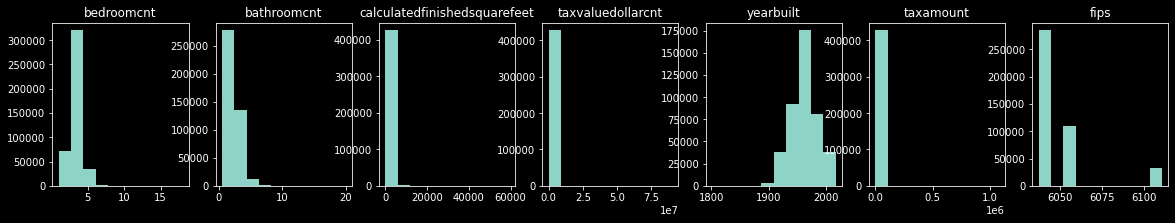

In [46]:
plt.figure(figsize=(20, 3))

# List of columns
cols = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'yearbuilt', 'taxamount', 'fips']

for i, col in enumerate(cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1,7, plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    test[col].hist(bins=10)

    # Hide gridlines.
    plt.grid(False)


In [26]:
train.isnull().sum()

id                              0
bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
propertylandusetypeid           0
dtype: int64

In [27]:
train.shape

(1197686, 9)

In [28]:
validate.isnull().sum()

id                              0
bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
propertylandusetypeid           0
dtype: int64

In [29]:
validate.shape

(513294, 9)

In [30]:
test.isnull().sum()

id                              0
bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
propertylandusetypeid           0
dtype: int64

In [31]:
test.shape

(427746, 9)

In [32]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1197686.0,1.491059e+06,860936.056513,20.00,745539.5,1490384.50,2236521.500,2982282.0
bedroomcnt,1197686.0,3.307509e+00,0.921539,1.00,3.0,3.00,4.000,25.0
bathroomcnt,1197686.0,2.244498e+00,0.986640,0.50,2.0,2.00,3.000,32.0
calculatedfinishedsquarefeet,1197686.0,1.863152e+03,962.814229,1.00,1259.0,1624.00,2208.000,39170.0
taxvaluedollarcnt,1197686.0,4.606958e+05,678464.879837,18.00,189230.5,328341.50,534763.500,88020448.0
yearbuilt,1197686.0,1.960973e+03,22.133877,1801.00,1949.0,1958.00,1975.000,2016.0
taxamount,1197686.0,5.616566e+03,7802.113424,17.66,2545.4,4117.06,6409.215,1052070.5
fips,1197686.0,6.048305e+03,20.334926,6037.00,6037.0,6037.00,6059.000,6111.0
propertylandusetypeid,1197686.0,2.610000e+02,0.000000,261.00,261.0,261.00,261.000,261.0


In [33]:
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.X_y(train, validate, test)